# Vehicle Dataset - Linear Regression


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random as r
import joblib as j

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import  r2_score


In [2]:
# load the data

data_df = pd.read_csv('./datasets/car details v4.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [3]:
# extract power 
def extract_power(power_str):
    try:
        # Extract the numeric value before 'bhp'
        power = float(power_str.split('bhp')[0].strip())
        return power
    except:
        return None
    
# extract torque
def extract_torque(torque_str):
    try:
        # Extract the numeric value before 'Nm'
        torque = float(torque_str.split('Nm')[0].strip())
        return torque
    except:
        return None

def convert_power_to_kw(bhp):
    if bhp is not None:
        return bhp * 0.745699872
    return None

def convert_torque_to_lbft(nm):
    if nm is not None:
        return nm * 0.737562149
    return None


In [4]:
# Transform data by converting Max power and Max torque into continuous values

# Extract numeric values
data_df['Power_bhp'] = data_df['Max Power'].apply(extract_power)
data_df['Torque_nm'] = data_df['Max Torque'].apply(extract_torque)

# Convert to other units
data_df['Power_kW'] = data_df['Power_bhp'].apply(convert_power_to_kw)
data_df['Torque_lbft'] = data_df['Torque_nm'].apply(convert_torque_to_lbft)

# Reset the index after dropping NaN values
data_df = data_df.dropna()
data_df = data_df.dropna().reset_index(drop=True)

data_df.head(2)


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Power_bhp,Torque_nm,Power_kW,Torque_lbft
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,FWD,3990.0,1680.0,1505.0,5.0,35.0,87.0,109.0,64.875889,80.394274
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,FWD,3995.0,1695.0,1555.0,5.0,42.0,74.0,190.0,55.181791,140.136808


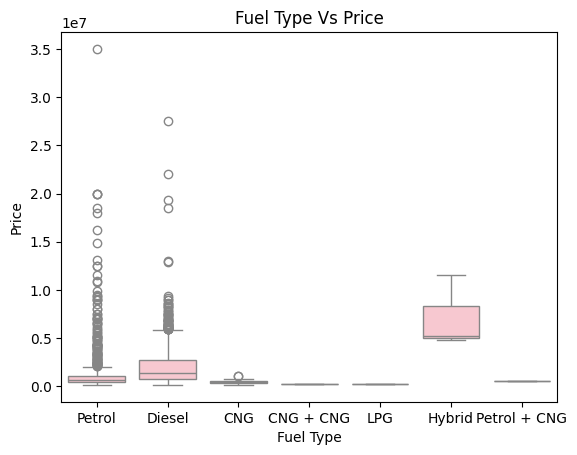

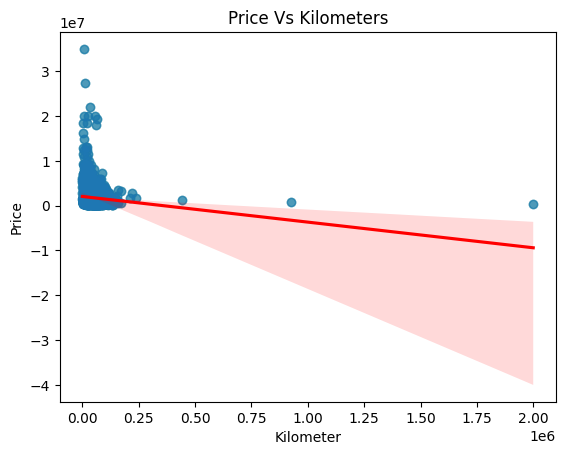

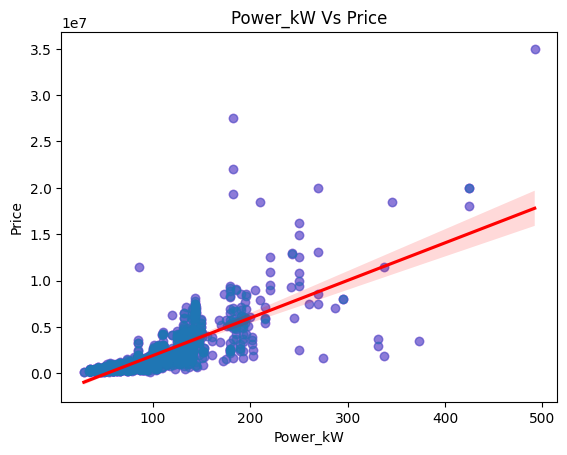

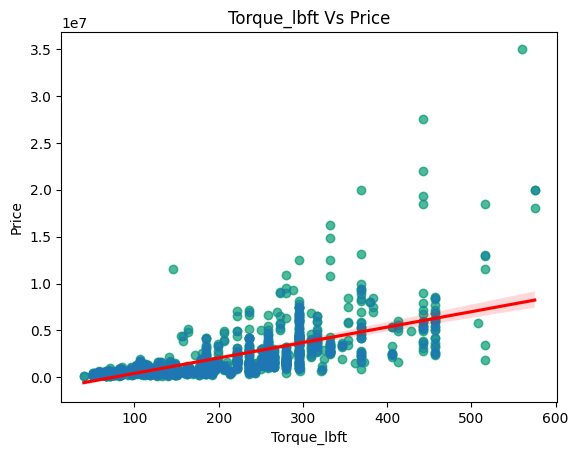

In [5]:
# Regression line

# From the above description from the dataset, I intend to find the relationships between the following features
# -> kilometers - price
# -> fuel type - price
# -> power_kW - price
# -> torque_lbft - price

# We now plot a scatter plot on the dependent and independent pairs to check the linearity of features
# before we consider them for the regression model

# Fuel Type Vs Price

sns.boxplot(x="Fuel Type", y="Price", data = data_df, color="pink")
plt.title("Fuel Type Vs Price")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

# Kilometer Vs Price

plt.scatter(x=data_df["Kilometer"], y= data_df["Price"], c="teal", alpha=0.5)
sns.regplot(data=data_df, x="Kilometer", y="Price", 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title("Price Vs Kilometers")
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.show()

# Power_kW Vs Price

plt.scatter(x=data_df["Power_kW"], y= data_df["Price"], c="magenta", alpha=0.5)
sns.regplot(data=data_df, x="Power_kW", y="Price", 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title("Power_kW Vs Price")
plt.xlabel("Power_kW")
plt.ylabel("Price")
plt.show()

# Torque_lbft Vs Price

plt.scatter(x=data_df["Torque_lbft"], y= data_df["Price"], c="lime", alpha=0.5)
sns.regplot(data=data_df, x="Torque_lbft", y="Price", 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title("Torque_lbft Vs Price")
plt.xlabel("Torque_lbft")
plt.ylabel("Price")
plt.show()

In [6]:
# prepare the data 

x = data_df[['Kilometer', 'Power_kW', 'Torque_lbft']]
y = data_df['Price']

# check the shape of the data. 
# Anything that's being plotted on X-axis should be 2D
print(f"X: {x.shape} \nY: {y.shape}")

X: (1804, 3) 
Y: (1804,)


In [7]:
# generate a random SEED value
SEED = r.randint(0,5000)

# split the training and testing data in 70-30
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.7,random_state=SEED)

# build the model
model = LinearRegression()

# fit the model
model.fit(xtrain, ytrain)

# check the incercept(m) and coefficient(c) of the line(y = mx + c)
print(f"m: {model.intercept_} \nc: {model.coef_}")


m: -2015823.7790841847 
c: [-3.17068389e+00  4.45431916e+04 -2.06400830e+03]


In [8]:
# predict the Y values from the test set
ypred = model.predict(xtest)

# calculate the accuracy using R2-score
r2_result = r2_score(ytest,ypred)

print(f"R2-score: {r2_result}")

R2-score: 0.5656479538139766


## Store the fine model


In [9]:
accuracy_list = []
models = []

for i in range(5000):
    x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.7, random_state=i)
    fine_model = LinearRegression()
    fine_model.fit(x_train,y_train)
    
    y_pred = fine_model.predict(x_test)
    r2_result = r2_score(y_test,y_pred)
    
    accuracy_list.append(r2_result)
    models.append(fine_model)

In [10]:
# max accuracy in the fitted models
max_accuracy = np.max(accuracy_list)

# find the index of the max value
model_idx = np.argmax(accuracy_list)
    
print(f"accuracy list: {accuracy_list}")
print(f"Max accuracy of the fitted model: {max_accuracy}")
print(f"Model Idx with max accuracy: {model_idx}")

accuracy list: [0.5201816438876207, 0.6269390274415454, 0.5430981708984479, 0.5840240831272818, 0.48148238031291435, 0.5457342734504042, 0.4950437501607734, 0.4291936513033894, 0.718643846299859, 0.574314008721992, 0.2737231133597211, 0.6081436401234993, 0.6076724022331752, 0.5960114987903999, 0.518043126135191, 0.631696058442401, 0.5366483295310135, 0.2062157397295813, 0.6788053899967388, 0.5791299947336119, 0.6756831273701636, 0.6046804019233549, 0.6622433098225712, 0.3733615539827714, 0.5179273441378072, 0.6228663843416722, 0.674297984348103, 0.5385637080700469, 0.6416744281607867, 0.46104132606577053, 0.532010072976921, 0.6056212092314359, 0.6897307111655393, 0.6963489596713579, 0.5526148341928397, 0.686736645842601, 0.6701143090415124, 0.6689142361857849, 0.6911966094544055, 0.5206107099648567, 0.5874309968333494, 0.6746268263914914, 0.7105913455850559, 0.657017892906528, 0.6365275121612719, 0.600000094647611, 0.6102791692688307, 0.43721371376513296, 0.5328435609944076, 0.59335284

In [11]:
# save the model

j.dump(models[model_idx], "multiple-linear-fine-model.pkl")

['multiple-linear-fine-model.pkl']

In [12]:
# predict the saved model

trained_model = j.load("./multiple-linear-fine-model.pkl")

# 'Kilometer', 'Power_kW', 'Torque_lbft'
pred_price = trained_model.predict([[50, 89.25, 5.86]])
print(pred_price)

[1536200.1285462]


c:\Users\supri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
